# Actividad práctica 

### Instrucciones
- Escriba las rutinas de Python necesarias para resolver los problemas de cada punto
- Siga las instrucciones y conteste donde se pida
- Entregue el notebook con sus respuestas al correo: phuijse@inf.uach.cl
- El trabajo es individual

### Introducción
En esta actividad usaremos la base de datos [*Auto Milles per Gallon Data Set*](https://archive.ics.uci.edu/ml/datasets/auto+mpg) del repositorio UCI

Puede descargarla usando el siguiente bloque

In [1]:
# %%bash
# wget -O auto.csv -c https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original 
# wget -O README -c https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names 

### Información preliminar

1. Use las herramientas de UNIX para leer el archivo README en el notebook
1. Responda ¿Cuántos y cuáles son los atributos (características)? ¿De qué tipo es cada uno?
1. Responda ¿Cuantas instancias/ejemplos existen?


In [2]:
%%bash 
cat README

1. Title: Auto-Mpg Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University. The dataset was 
                used in the 1983 American Statistical Association Exposition.
   (c) Date: July 7, 1993

3. Past Usage:
    -  See 2b (above)
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   This dataset is a slightly modified version of the dataset provided in
   the StatLib library.  In line with the use by Ross Quinlan (1993) in
   predicting the attribute "mpg", 8 of the original instances were removed 
   because they had unknown values for the "mpg" attribute.  The original 
   dataset is available in the file "auto-mpg.data-original".

   "The data concerns city-cycle fuel consumptio

Tienen 9 características:
- mpg, continuo
- cylinders, multivalor discreto
- displacement, continuo
- horsepower, continuo
- weight, continuo
- acceleration, continuo
- model year, multivalor discreto
- origin, multivalor discreto
- car name, String

El README indica que hay 398 observaciones, en realidad hay 406

### Lectura de datos

1. Cree un `DataFrame` a partir de `auto.csv` 
    1. Use una columna por atributo* 
    1. Use los nombres de columna descritos en `README` 
1. Imprima las primeras 5 filas del dataframe

**HINT:** Verifique el uso  del argumento `delim_whitespace`*

In [3]:
import pandas as pd
clase=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
df=pd.read_csv("auto.csv",names=clase,delim_whitespace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


### Manipulación de columnas 

1. Convierta las columnas *cylinders*, *year* y *origin* a valores enteros
1. Reemplace los valores $[1, 2, 3]$ de *origin* por *USA*, *Europe*, *Japan*, respectivamente
1. Convierta los valores de la columna *mpg* (galones por milla) a kmpl (kilómetros por litro)
1. Convierta los valores de la columna peso de libras (*pounds*) a kilogramos
1. Modifique el nombre de la columna *mpg* a kmpl


In [4]:
a_convertir=['cylinders','model year','origin']
conv=dict.fromkeys(a_convertir, lambda x: int(float(x)))

In [5]:
df=pd.read_csv("auto.csv",names=clase,delim_whitespace=True,converters=conv)
df.origin.loc[(df.origin)==1]="USA"
df.origin.loc[(df.origin)==2]="Europe"
df.origin.loc[(df.origin)==3]="Japan"

#mpg2kpl=mpg*0.354
# lbs2kg=lbs*0.453592
df.mpg=df.mpg*0.354
df=df.rename(columns={'mpg':'kpl'})
df.weight=df.weight*0.453592

df.head()

/home/fabian/.local/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,kpl,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,6.372,8,307.0,130.0,1589.386368,12.0,70,USA,chevrolet chevelle malibu
1,5.310,8,350.0,165.0,1675.115256,11.5,70,USA,buick skylark 320
2,6.372,8,318.0,150.0,1558.542112,11.0,70,USA,plymouth satellite
3,5.664,8,304.0,150.0,1557.181336,12.0,70,USA,amc rebel sst
4,6.018,8,302.0,140.0,1564.438808,10.5,70,USA,ford torino


### Datos perdidos

1. Encuentre los nombres de los autos que tengan valores perdidos (*missing data*)
1. Encuentre los nombres de los atributos que tengan valores perdidos
1. Elimines las filas con atributos perdidos ¿Cuántas filas quedan en el dataframe?

In [6]:
df.count(axis=0)

kpl             398
cylinders       406
displacement    406
horsepower      400
weight          406
acceleration    406
model year      406
origin          406
car name        406
dtype: int64

In [7]:
print(df[df.isnull().any(axis=1)]["car name"])
nulls=df.columns[df.isnull().any()]
print("\n\ncolumnas con datos faltantes: ",nulls)
df[nulls].isnull().sum()

10                 citroen ds-21 pallas
11     chevrolet chevelle concours (sw)
12                     ford torino (sw)
13              plymouth satellite (sw)
14                   amc rebel sst (sw)
17                ford mustang boss 302
38                           ford pinto
39          volkswagen super beetle 117
133                       ford maverick
337                renault lecar deluxe
343                  ford mustang cobra
361                         renault 18i
367                           saab 900s
382                      amc concord dl
Name: car name, dtype: object


columnas con datos faltantes:  Index(['kpl', 'horsepower'], dtype='object')


kpl           8
horsepower    6
dtype: int64

In [8]:
df=df.dropna(axis='rows',how='any')
df.count(axis=0)

kpl             392
cylinders       392
displacement    392
horsepower      392
weight          392
acceleration    392
model year      392
origin          392
car name        392
dtype: int64

### Multi-índice

1. Cree un dataframe con dos columnas a partir del atributo "*car name*"
    1. La primera columna debe tener la primera palabra del string en *car name**
    1. La segunda columna debe tener el resto del string en *car name*
1. Elimine la columna *car name* del dataframe y agregue estas nuevas columnas llamándolas *brand* y *model*, respectivamente
1. ¿Cuántas marcas (*brand*) únicas existan? ¿Existen columnas repetidas o mal escritas? Mencione cuales y corrijalas**
1. Cree un multi-índice que utilice como primera llave a *brand* y como segunda a *model*
1. Muestre los autos con marca *Mazda*
1. Usando groupby cuente la cantidad de modelos por marca

**HINT:** Verifique el uso de `.str.split()`* y `str.replace()`**

In [9]:
cars=df["car name"].str.split(n=1,expand=True)
cars=cars.rename(columns={0:'brand',1:'model'})
cars.head()

,brand,model
0,chevrolet,chevelle malibu
1,buick,skylark 320
2,plymouth,satellite
3,amc,rebel sst
4,ford,torino


In [10]:
fd=df.drop(columns=["car name"])
df=pd.concat([fd, cars], axis=1, ignore_index=False)
df.head()

,kpl,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand,model
0,6.372,8,307.0,130.0,1589.386368,12.0,70,USA,chevrolet,chevelle malibu
1,5.310,8,350.0,165.0,1675.115256,11.5,70,USA,buick,skylark 320
2,6.372,8,318.0,150.0,1558.542112,11.0,70,USA,plymouth,satellite
3,5.664,8,304.0,150.0,1557.181336,12.0,70,USA,amc,rebel sst
4,6.018,8,302.0,140.0,1564.438808,10.5,70,USA,ford,torino


In [11]:
display(df.brand.describe(),
       df.brand.unique(),
       df.model.describe(),
        pd.Series(df.model.unique()).sort_values(axis=0)
       )
#corregir toyouta->toyota (vw-vokswagen)->volkswagen mercedes->mercedes-benz maxda->mazda (chevy-chevroelt)->chevorlet 
# FIAT & CHRYSLER



count      392
unique      37
top       ford
freq        48
Name: brand, dtype: object

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

count        390
unique       295
top       rabbit
freq           5
Name: model, dtype: object

11             'cuda 340
21                100 ls
101                100ls
19     1131 deluxe sedan
68               12 (sw)
47                  1200
28                 1200d
96       124 sport coupe
117               124 tc
45                  124b
99                   128
138                 12tl
136                  131
102                144ea
65             145e (sw)
43                  1900
203               200-sx
23                  2002
262                200sx
226                  210
254              210 mpg
243                 240d
134                244dl
147                  245
205                264gl
245               280-zx
149                 280s
44                   304
233                  310
283               310 gx
             ...        
228      skylark limited
221            spirit dl
217            st. regis
281            stanza xe
202          starfire sx
251              starlet
227        strada custom
171        sunbird coupe
87          super beetle


In [12]:
display(df.loc[df['brand'] == 'hi'],#QUE CARAJOS ES HI????
        df.loc[df['model'].isnull()])

,kpl,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand,model
34,3.186,8,304.0,193.0,2146.397344,18.5,70,USA,hi,1200d


,kpl,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand,model
157,9.2040,4,108.0,93.0,1084.538472,15.5,74,Japan,subaru,None
353,11.4342,4,97.0,67.0,936.667480,17.8,81,Japan,subaru,None


In [13]:
df.brand=df.brand.str.replace("vw","volkswagen")
df.brand=df.brand.str.replace("toyouta","toyota")
df.brand=df.brand.str.replace("maxda","mazda")
df.brand=df.brand.str.replace("vokswagen","volkswagen")
df.brand=df.brand.str.replace("chevroelt","chevrolet")
df.brand=df.brand.str.replace("chevy","chevrolet")
df.brand=df.brand.str.replace("mercedes-benz","mercedes")
df.brand=df.brand.str.replace("mercedes-benz","mercedes-benz")
df.model=df.model.str.replace("benz ","")

df

,kpl,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand,model
0,6.372,8,307.0,130.0,1589.386368,12.0,70,USA,chevrolet,chevelle malibu
1,5.310,8,350.0,165.0,1675.115256,11.5,70,USA,buick,skylark 320
2,6.372,8,318.0,150.0,1558.542112,11.0,70,USA,plymouth,satellite
3,5.664,8,304.0,150.0,1557.181336,12.0,70,USA,amc,rebel sst
4,6.018,8,302.0,140.0,1564.438808,10.5,70,USA,ford,torino
5,5.310,8,429.0,198.0,1969.042872,10.0,70,USA,ford,galaxie 500
6,4.956,8,454.0,220.0,1974.939568,9.0,70,USA,chevrolet,impala
7,4.956,8,440.0,215.0,1955.888704,8.5,70,USA,plymouth,fury iii
8,4.956,8,455.0,225.0,2007.144600,10.0,70,USA,pontiac,catalina
9,5.310,8,390.0,190.0,1746.329200,8.5,70,USA,amc,ambassador dpl


In [14]:
df = df.set_index(["brand", "model"])

In [15]:
df.sort_index(axis=0).head(20)

kpl  cylinders  displacement  horsepower  \
brand model                                                                 
amc   ambassador brougham     4.6020          8         360.0       175.0   
      ambassador dpl          5.3100          8         390.0       190.0   
      ambassador sst          6.0180          8         304.0       150.0   
      concord                 6.8676          6         232.0        90.0   
      concord                 8.6022          4         151.0        90.0   
      concord d/l             6.4074          6         258.0       120.0   
      concord dl 6            7.1508          6         232.0        90.0   
      gremlin                 7.4340          6         199.0        90.0   
      gremlin                 6.7260          6         232.0       100.0   
      gremlin                 6.3720          6         232.0       100.0   
      gremlin                 7.0800          6         232.0       100.0   
      hornet                  6.3720          6         199.0        97.0   
      hornet                  6.3720          6         232.0       100.0   
      hornet                  6.7260          6         232.0       100.0   
      hornet                  7.9650          6         232.0        90.0   
      hornet sportabout (sw)  6.3720          6         258.0       110.0   
      matador                 6.3720          6         232.0       100.0   
      matador                 4.9560          8         304.0       150.0   
      matador                 5.6640          6         258.0       110.0   
      matador                 5.3100          6         258.0       110.0   

                                   weight  acceleration  model year origin  
brand model                                                                 
amc   ambassador brougham     1733.175032          11.0          73    USA  
      ambassador dpl          1746.329200           8.5          70    USA  
      ambassador sst          1665.589824          11.5          72    USA  
      concord                 1456.030320          17.2          78    USA  
      concord                 1362.136776          20.1          80    USA  
      concord d/l             1546.748720          15.1          78    USA  
      concord dl 6            1480.977880          18.2          79    USA  
      gremlin                 1201.111616          15.0          70    USA  
      gremlin                 1194.761328          13.0          71    USA  
      gremlin                 1265.068088          15.0          73    USA  
      gremlin                 1321.767088          16.0          75    USA  
      hornet                  1258.264208          15.5          70    USA  
      hornet                  1335.828440          16.0          73    USA  
      hornet                  1315.870392          16.0          74    USA  
      hornet                  1399.331320          17.6          76    USA  
      hornet sportabout (sw)  1343.539504          13.5          71    USA  
      matador                 1491.410496          15.5          71    USA  
      matador                 1665.589824          11.5          73    USA  
      matador                 1647.446144          18.0          74    USA  
      matador                 1691.898160          19.0          75    USA

In [16]:
df.filter(like='mazda', axis=0)

kpl  cylinders  displacement  horsepower       weight  \
brand model                                                                     
mazda rx2 coupe      6.7260          3          70.0        97.0  1056.869360   
      rx3            6.3720          3          70.0        90.0   963.429408   
      rx-4           7.6110          3          80.0       110.0  1233.770240   
      glc deluxe    11.6112          4          78.0        52.0   900.380120   
      glc deluxe    12.0714          4          86.0        65.0   895.844200   
      626           11.0802          4         120.0        75.0  1153.030864   
      glc           16.4964          4          86.0        65.0   957.079120   
      rx-7 gs        8.3898          3          70.0       100.0  1097.692640   
      glc 4         12.0714          4          91.0        68.0   900.380120   
      626           11.1864          4         120.0        74.0  1195.214920   
      glc custom l  13.0980          4          91.0        68.0   918.523800   
      glc custom    10.9740          4          91.0        68.0   893.576240   

                    acceleration  model year origin  
brand model                                          
mazda rx2 coupe             13.5          72  Japan  
      rx3                   13.5          73  Japan  
      rx-4                  13.5          77  Japan  
      glc deluxe            19.4          78  Japan  
      glc deluxe            15.2          79  Japan  
      626                   17.5          80  Japan  
      glc                   17.9          80  Japan  
      rx-7 gs               12.5          80  Japan  
      glc 4                 16.0          81  Japan  
      626                   18.3          81  Japan  
      glc custom l          18.2          82  Japan  
      glc custom            17.6          82  Japan

In [17]:
# Usando groupby cuente la cantidad de modelos por marca
display(df.groupby("brand").count(),#cuenta todas las observaciones con las misma brand(ignora modelos repetidos)
        (df.groupby(["brand","model"]).count()).groupby("brand").count()#toma en cuenta modelos repetidos
        )

,kpl,cylinders,displacement,horsepower,weight,acceleration,model year,origin
brand,,,,,,,,
amc,27,27,27,27,27,27,27,27
audi,7,7,7,7,7,7,7,7
bmw,2,2,2,2,2,2,2,2
buick,17,17,17,17,17,17,17,17
cadillac,2,2,2,2,2,2,2,2
capri,1,1,1,1,1,1,1,1
chevrolet,47,47,47,47,47,47,47,47
chrysler,6,6,6,6,6,6,6,6
datsun,23,23,23,23,23,23,23,23


,kpl,cylinders,displacement,horsepower,weight,acceleration,model year,origin
brand,,,,,,,,
amc,15,15,15,15,15,15,15,15
audi,6,6,6,6,6,6,6,6
bmw,2,2,2,2,2,2,2,2
buick,14,14,14,14,14,14,14,14
cadillac,2,2,2,2,2,2,2,2
capri,1,1,1,1,1,1,1,1
chevrolet,28,28,28,28,28,28,28,28
chrysler,6,6,6,6,6,6,6,6
datsun,20,20,20,20,20,20,20,20


### Buscando autos

1. Por cada marca encuentre el auto más antiguo y el más nuevo
1. Por cada marca encuentre el auto más pesado y el más liviano
1. Por cada marca encuentre los autos con mayor y menor caballos de fuerza, respectivamente
1. Por cada marca encuentre los autos con menor y mayor desempeño en términos de kmpl, respectivamente

In [18]:
import ipywidgets as widgets
# column="model year" # modificar con "model year", "weight", "horsepower", "kpl"
columna=["model year", "weight", "horsepower", "kpl"]
@widgets.interact(column=columna)
def imprimir(column):
    for brand in df.index.levels[0]:
        temp=pd.DataFrame(df.filter(like=brand, axis=0)[column])
        display((temp.loc[temp[column]==temp[column].min()]).append((temp.loc[temp[column]==temp[column].max()]),ignore_index=False,verify_integrity=False))


interactive(children=(Dropdown(description='column', options=('model year', 'weight', 'horsepower', 'kpl'), va…

### Análisis exploratorio

1. Encuentre el promedio y la desviación estándar de cada atributo numérico en toda la tabla y por marca
1. Construya gráficos de barras del rendimiento (kmpl) promedio en función del año, peso, origen,  número de cilindros y marca (use *barras de error* con la desviación estándar del rendimiento)
1. Viendo estos gráficos, ¿Qué puede concluir respecto a la relación del rendimiento con estos factores?

In [19]:
import matplotlib.pyplot as plt
display("media general",df.mean(),
        "desviacion estandar general",df.std() 
       )
for brand in df.index.levels[0]:
    disp=df.filter(like=brand, axis=0)
    display(brand,"media", disp.mean(),"desviacion estandar", disp.std())

'media general'

kpl                8.299855
cylinders          5.471939
displacement     194.411990
horsepower       104.469388
weight          1350.608365
acceleration      15.541327
model year        75.979592
dtype: float64

'desviacion estandar general'

kpl               2.762973
cylinders         1.705783
displacement    104.644004
horsepower       38.491160
weight          385.282206
acceleration      2.758864
model year        3.683737
dtype: float64

'amc'

'media'

kpl                6.396911
cylinders          6.444444
displacement     253.851852
horsepower       114.703704
weight          1492.200082
acceleration      15.070370
model year        74.000000
dtype: float64

'desviacion estandar'

kpl               1.141777
cylinders         1.154701
displacement     56.839656
horsepower       29.431557
weight          206.571831
acceleration      2.730006
model year        3.012793
dtype: float64

'audi'

'media'

kpl                9.456857
cylinders          4.285714
displacement     111.857143
horsepower        86.714286
weight          1159.445951
acceleration      15.942857
model year        75.714286
dtype: float64

'desviacion estandar'

kpl               2.348031
cylinders         0.487950
displacement     12.253279
horsepower       11.842217
weight          132.877537
acceleration      1.946670
model year        3.773340
dtype: float64

'bmw'

'media'

kpl                8.407500
cylinders          4.000000
displacement     121.000000
horsepower       111.500000
weight          1096.331864
acceleration      12.650000
model year        73.500000
dtype: float64

'desviacion estandar'

kpl               1.126421
cylinders         0.000000
displacement      0.000000
horsepower        2.121320
weight          117.390100
acceleration      0.212132
model year        4.949747
dtype: float64

'buick'

'media'

kpl                6.790553
cylinders          6.470588
displacement     272.941176
horsepower       136.411765
weight          1611.772467
acceleration      14.700000
model year        76.117647
dtype: float64

'desviacion estandar'

kpl               2.039392
cylinders         1.504894
displacement    103.366140
horsepower       45.098585
weight          354.438685
acceleration      2.581666
model year        3.756367
dtype: float64

'cadillac'

'media'

kpl                6.99150
cylinders          8.00000
displacement     350.00000
horsepower       152.50000
weight          1877.87088
acceleration      14.75000
model year        77.50000
dtype: float64

'desviacion estandar'

kpl               1.627053
cylinders         0.000000
displacement      0.000000
horsepower       38.890873
weight          153.954230
acceleration      3.747666
model year        2.121320
dtype: float64

'capri'

'media'

kpl                6.873500
cylinders          6.333333
displacement     237.833333
horsepower       118.333333
weight          1470.242869
acceleration      13.800000
model year        74.833333
dtype: float64

'desviacion estandar'

kpl               1.560882
cylinders         1.966384
displacement    114.167275
horsepower       27.266585
weight          422.800952
acceleration      1.325142
model year        2.994439
dtype: float64

'chevrolet'

'media'

kpl                7.157579
cylinders          6.170213
displacement     239.446809
horsepower       114.638298
weight          1504.738380
acceleration      15.397872
model year        75.531915
dtype: float64

'desviacion estandar'

kpl               2.274428
cylinders         1.760918
displacement    102.634389
horsepower       37.132211
weight          364.708309
acceleration      3.112352
model year        3.705760
dtype: float64

'chrysler'

'media'

kpl                6.112400
cylinders          7.000000
displacement     330.166667
horsepower       153.666667
weight          1774.451904
acceleration      13.300000
model year        77.333333
dtype: float64

'desviacion estandar'

kpl               1.715592
cylinders         1.673320
displacement    113.226175
horsepower       54.650404
weight          355.398522
acceleration      1.977878
model year        4.131182
dtype: float64

'datsun'

'media'

kpl               11.014017
cylinders          4.260870
displacement     103.260870
horsepower        83.826087
weight          1017.051871
acceleration      16.408696
model year        76.869565
dtype: float64

'desviacion estandar'

kpl               2.025472
cylinders         0.688700
displacement     24.907497
horsepower       19.253458
weight          154.719605
acceleration      2.122801
model year        3.696489
dtype: float64

'dodge'

'media'

kpl                7.809493
cylinders          6.000000
displacement     223.125000
horsepower       117.178571
weight          1454.329350
acceleration      14.460714
model year        76.535714
dtype: float64

'desviacion estandar'

kpl               2.681247
cylinders         1.885618
displacement    102.476522
horsepower       37.724198
weight          402.129362
acceleration      2.235959
model year        3.636055
dtype: float64

'fiat'

'media'

kpl              10.235025
cylinders         4.000000
displacement     92.125000
horsepower       73.375000
weight          972.104355
acceleration     15.650000
model year       74.250000
dtype: float64

'desviacion estandar'

kpl              1.452379
cylinders        0.000000
displacement    15.132156
horsepower      12.546343
weight          82.690505
acceleration     1.688617
model year       2.375470
dtype: float64

'ford'

'media'

kpl                6.894150
cylinders          6.166667
displacement     239.354167
horsepower       112.229167
weight          1517.038444
acceleration      15.291667
model year        75.520833
dtype: float64

'desviacion estandar'

kpl               2.101479
cylinders         1.742257
displacement     97.255638
horsepower       37.139323
weight          370.650803
acceleration      2.448954
model year        3.690065
dtype: float64

'hi'

'media'

kpl                5.569600
cylinders          7.333333
displacement     285.333333
horsepower       136.666667
weight          1795.619531
acceleration      17.433333
model year        74.666667
dtype: float64

'desviacion estandar'

kpl               2.100665
cylinders         1.154701
displacement     30.615900
horsepower       57.535496
weight          303.783852
acceleration      4.202777
model year        4.163332
dtype: float64

'honda'

'media'

kpl              11.951585
cylinders         4.000000
displacement     97.230769
horsepower       67.846154
weight          917.791074
acceleration     15.992308
model year       78.923077
dtype: float64

'desviacion estandar'

kpl               1.686587
cylinders         0.000000
displacement     10.417564
horsepower       11.312575
weight          103.855654
acceleration      1.406213
model year        2.782731
dtype: float64

'mazda'

'media'

kpl               10.640650
cylinders          3.666667
displacement      87.750000
horsepower        77.666667
weight          1013.815919
acceleration      16.091667
model year        78.750000
dtype: float64

'desviacion estandar'

kpl               2.919489
cylinders         0.492366
displacement     17.104625
horsepower       17.452967
weight          127.387714
acceleration      2.367376
model year        3.278719
dtype: float64

'mercedes'

'media'

kpl                8.484200
cylinders          5.000000
displacement     165.666667
horsepower        88.000000
weight          1602.691733
acceleration      19.533333
model year        78.333333
dtype: float64

'desviacion estandar'

kpl               2.429568
cylinders         1.000000
displacement     18.610033
horsepower       28.160256
weight          129.280351
acceleration      2.596793
model year        2.081666
dtype: float64

'mercury'

'media'

kpl                6.767836
cylinders          6.545455
displacement     258.000000
horsepower       119.818182
weight          1555.160790
acceleration      14.963636
model year        76.090909
dtype: float64

'desviacion estandar'

kpl               2.415039
cylinders         1.572491
displacement    115.108644
horsepower       48.157696
weight          435.429721
acceleration      3.045414
model year        3.505839
dtype: float64

'nissan'

'media'

kpl              12.74400
cylinders         4.00000
displacement    120.00000
horsepower       88.00000
weight          979.75872
acceleration     14.50000
model year       82.00000
dtype: float64

'desviacion estandar'

kpl            NaN
cylinders      NaN
displacement   NaN
horsepower     NaN
weight         NaN
acceleration   NaN
model year     NaN
dtype: float64

'oldsmobile'

'media'

kpl                7.469400
cylinders          7.200000
displacement     276.600000
horsepower       122.000000
weight          1621.999633
acceleration      16.020000
model year        77.200000
dtype: float64

'desviacion estandar'

kpl               3.006940
cylinders         1.398412
displacement     73.860529
horsepower       37.357135
weight          285.331638
acceleration      3.548959
model year        3.457681
dtype: float64

'opel'

'media'

kpl               9.41640
cylinders         4.00000
displacement    111.20000
horsepower       80.80000
weight          993.91079
acceleration     15.14000
model year       74.20000
dtype: float64

'desviacion estandar'

kpl              0.852545
cylinders        0.000000
displacement     8.228001
horsepower       5.630275
weight          31.857210
acceleration     1.123833
model year       2.387467
dtype: float64

'peugeot'

'media'

kpl                8.385375
cylinders          4.250000
displacement     124.250000
horsepower        88.000000
weight          1348.415618
acceleration      19.550000
model year        75.250000
dtype: float64

'desviacion estandar'

kpl               1.687723
cylinders         0.707107
displacement     24.978562
horsepower       19.654153
weight          194.826646
acceleration      2.892848
model year        3.991061
dtype: float64

'plymouth'

'media'

kpl                7.682942
cylinders          6.000000
displacement     222.741935
horsepower       111.419355
weight          1460.098016
acceleration      14.851613
model year        75.096774
dtype: float64

'desviacion estandar'

kpl               2.758498
cylinders         1.632993
displacement     94.285725
horsepower       37.713635
weight          371.159369
acceleration      2.599342
model year        3.815362
dtype: float64

'pontiac'

'media'

kpl                7.084425
cylinders          6.250000
displacement     282.625000
horsepower       136.937500
weight          1658.020507
acceleration      14.081250
model year        75.500000
dtype: float64

'desviacion estandar'

kpl               2.225114
cylinders         1.770122
displacement    121.453352
horsepower       51.815659
weight          392.447551
acceleration      3.115813
model year        3.915780
dtype: float64

'renault'

'media'

kpl              10.502000
cylinders         4.000000
displacement     92.000000
horsepower       70.000000
weight          939.842624
acceleration     17.300000
model year       75.000000
dtype: float64

'desviacion estandar'

kpl              1.949680
cylinders        0.000000
displacement    11.532563
horsepower      12.529964
weight          97.071867
acceleration     1.757840
model year       2.645751
dtype: float64

'saab'

'media'

kpl                8.460600
cylinders          4.000000
displacement     116.750000
horsepower       108.750000
weight          1190.792398
acceleration      15.175000
model year        74.000000
dtype: float64

'desviacion estandar'

kpl              0.567873
cylinders        0.000000
displacement     8.500000
horsepower       9.464847
weight          80.607076
acceleration     1.813606
model year       3.366502
dtype: float64

'subaru'

'media'

kpl              10.805850
cylinders         4.000000
displacement     99.750000
horsepower       73.500000
weight          973.635228
acceleration     16.925000
model year       78.000000
dtype: float64

'desviacion estandar'

kpl              1.202689
cylinders        0.000000
displacement     5.500000
horsepower      13.000000
weight          79.651151
acceleration     1.187083
model year       3.162278
dtype: float64

'toyota'

'media'

kpl                9.970546
cylinders          4.230769
displacement     111.653846
horsepower        83.961538
weight          1047.361374
acceleration      16.038462
model year        76.346154
dtype: float64

'desviacion estandar'

kpl               1.998089
cylinders         0.651625
displacement     26.840182
horsepower       18.173565
weight          160.121059
acceleration      2.020312
model year        3.938957
dtype: float64

'triumph'

'media'

kpl               12.39
cylinders          4.00
displacement     122.00
horsepower        88.00
weight          1133.98
acceleration      15.10
model year        80.00
dtype: float64

'desviacion estandar'

kpl            NaN
cylinders      NaN
displacement   NaN
horsepower     NaN
weight         NaN
acceleration   NaN
model year     NaN
dtype: float64

'volkswagen'

'media'

kpl              11.271682
cylinders         4.000000
displacement     95.045455
horsepower       64.136364
weight          927.966761
acceleration     17.404545
model year       76.727273
dtype: float64

'desviacion estandar'

kpl              2.513570
cylinders        0.000000
displacement     8.254738
horsepower      11.622210
weight          82.199991
acceleration     3.818810
model year       3.627695
dtype: float64

'volvo'

'media'

kpl                7.475300
cylinders          4.666667
displacement     133.500000
horsepower       104.166667
weight          1375.593339
acceleration      15.566667
model year        75.833333
dtype: float64

'desviacion estandar'

kpl              1.770059
cylinders        1.032796
displacement    17.224982
horsepower      16.690317
weight          59.569370
acceleration     2.118175
model year       3.311596
dtype: float64

In [20]:
cols=["model year","weight","horsepower"]
cols2=["origin","brand"]

/home/fabian/.local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


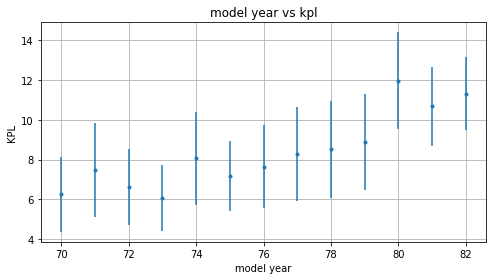

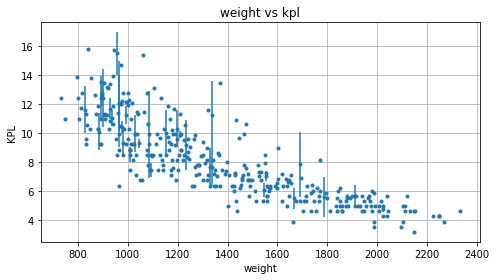

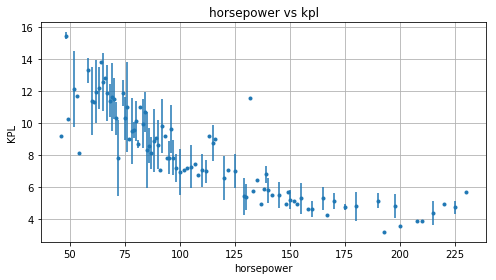

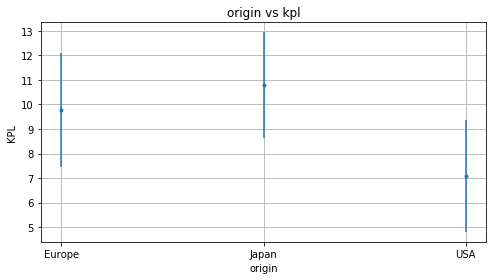

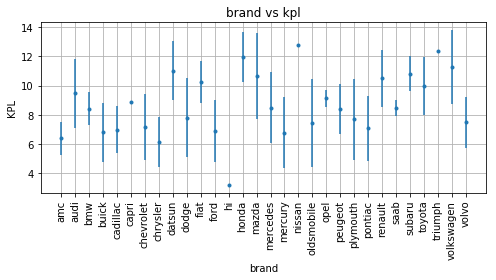

In [21]:
for i in cols:
    mean=df.groupby(i).mean()['kpl']
    std=df.groupby(i).std()['kpl']
    fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')
    
    ax.grid()
    ax.errorbar(x=mean.index, y=mean.values,yerr=std.values ,fmt='.', elinewidth=None, ecolor=None, capsize=None)
    ax.set_ylabel('KPL')
    ax.set_xlabel(i)
    title=i+" vs kpl"
    ax.set_title(title)

for i in cols2:
    mean=df.groupby(i).mean()['kpl']
    std=df.groupby(i).std()['kpl']
    fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')
    
    ax.grid()
    ax.errorbar(x=mean.index, y=mean.values,yerr=std.values ,fmt='.', elinewidth=None, ecolor=None, capsize=None)
    ax.set_ylabel('KPL')
    ax.set_xlabel(i)
    if(i=="brand"):
        for tick in ax.get_xticklabels():
            tick.set_rotation(90)
    title=i+" vs kpl"
    ax.set_title(title)

### Gráficos interactivos

1. Construya una interfaz gráfica usando `ipywidgets` que permita seleccionar dos atributos y los gráfique como un *scatter plot*
    1. El primer atributo será el eje de abscisas y el segundo atributo el eje de ordenadas
    1. Ese el atributo de origen como el color de los marcadores
1. Los gráficos deben ser legibles, los ejes deben estar etiquetados, use leyenda para los marcadores

In [24]:
list(df)

['kpl',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'origin']

In [25]:
%matplotlib notebook
import ipywidgets as widgets
%matplotlib notebook
slider_style = {'description_width': 'initial'}
select_x = widgets.Dropdown(description='X',options=columna,style=slider_style)
select_y = widgets.Dropdown(description='Y',options=["weight", "horsepower", "kpl"],style=slider_style)
push_data = widgets.Button(description='Enviar')

def on_change(change):
    # display(change.keys())
    nuevaColumna=columna.copy()
    nuevaColumna.remove(change['new'])
#     print(nuevaColumna)
    select_y .options=nuevaColumna

fig, ax1 = plt.subplots(figsize=(7, 4), facecolor='w')

def plotting(b):
    x,y=select_x.value,select_y.value
    ax1.cla()
    for index in ['Europe', 'Japan', 'USA']:
        aux=df.loc[df["origin"]==index]
        ax1.scatter(x=aux[x].values, y=aux[y].values,marker=None, s=None, c=None,label=index, alpha=1.)  
    ax1.set_xlabel(x, fontsize=15)
    ax1.set_ylabel(y, fontsize=15)
    ax1.legend()
    

push_data.on_click(plotting)
# push_data.on_click(lambda x: plotting(df[select_x.value],df[select_y.value]))
BOX=widgets.HBox([select_x,select_y, push_data])
BO2=widgets.HBox([select_x,select_y, push_data])
display(BOX)
select_x.observe(on_change, names='value')


<IPython.core.display.Javascript object>

NameError: name 'actualizar' is not defined

In [23]:
df.loc[df["origin"]=='USA']["kpl"]
df.loc[df["origin"]=='Japan']["kpl"]
df.loc[df["origin"]=='Europe']
# mean=df.groupby("origin").mean()['kpl']

# x =  list(map(lambda origin:['Europe', 'Japan', 'USA'].index(origin),mean.index))
# x

,,kpl,cylinders,displacement,horsepower,weight,acceleration,model year,origin
brand,model,,,,,,,,
volkswagen,1131 deluxe sedan,9.2040,4,97.0,46.0,832.341320,20.5,70,Europe
peugeot,504,8.8500,4,110.0,87.0,1211.997824,17.5,70,Europe
audi,100 ls,8.4960,4,107.0,90.0,1102.228560,14.5,70,Europe
saab,99e,8.8500,4,104.0,95.0,1077.281000,17.5,70,Europe
bmw,2002,9.2040,4,121.0,113.0,1013.324528,12.5,70,Europe
opel,1900,9.9120,4,116.0,90.0,962.975816,14.0,71,Europe
peugeot,304,10.6200,4,79.0,70.0,940.749808,19.5,71,Europe
fiat,124b,10.6200,4,88.0,76.0,936.667480,14.5,71,Europe
volkswagen,model 111,9.5580,4,97.0,60.0,831.887728,19.0,71,Europe
